In [24]:
import pandas as pd
import numpy as np

#Guarda data/hoteles-entrena.csv en dataframe
df = pd.read_csv('../data/hoteles-entrena.csv')
df.head()


,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,market_segment,distribution_channel,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,arrival_date
0,Resort_Hotel,342,0,0,2,none,BB,PRT,Direct,Direct,...,3,No_Deposit,NaN,NaN,0,Transient,0.0,none,0,2015-07-01
1,Resort_Hotel,737,0,0,2,none,BB,PRT,Direct,Direct,...,4,No_Deposit,NaN,NaN,0,Transient,0.0,none,0,2015-07-01
2,Resort_Hotel,7,0,1,1,none,BB,GBR,Direct,Direct,...,0,No_Deposit,NaN,NaN,0,Transient,75.0,none,0,2015-07-01
3,Resort_Hotel,13,0,1,1,none,BB,GBR,Corporate,Corporate,...,0,No_Deposit,304.0,NaN,0,Transient,75.0,none,0,2015-07-01
4,Resort_Hotel,14,0,2,2,none,BB,GBR,Online_TA,TA/TO,...,0,No_Deposit,240.0,NaN,0,Transient,98.0,none,1,2015-07-01


In [4]:
#Número de registros en el dataframe
print("Número de registros en el dataframe: ", len(df))

Número de registros en el dataframe:  52981


In [6]:
#Número de valores distintos en cada columna
print("Número de valores distintos en cada columna: ")
print(df.nunique())


Número de valores distintos en cada columna: 
hotel                                2
lead_time                          418
stays_in_weekend_nights             15
stays_in_week_nights                27
adults                               5
children                             2
meal                                 5
country                            146
market_segment                       7
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations               9
previous_bookings_not_canceled      61
reserved_room_type                   9
assigned_room_type                  10
booking_changes                     18
deposit_type                         3
agent                              298
company                            303
days_in_waiting_list                92
customer_type                        4
average_daily_rate                6393
required_car_parking_spaces          2
total_of_special_requests            6
arrival_date      

In [30]:
# Separar variables categóricas y numéricas
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['number']).columns

print("Variables categóricas: ", categorical_columns)
print("Variables numéricas: ", numerical_columns)

Variables categóricas:  Index(['hotel', 'children', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'required_car_parking_spaces',
       'arrival_date'],
      dtype='object')
Variables numéricas:  Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'average_daily_rate',
       'total_of_special_requests', 'children_new'],
      dtype='object')


In [75]:
#Valores distintos de meal
variable = 'customer_type'
print(f"Valores distintos de {variable}: ")
print(df[variable].unique())

Valores distintos de customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']


Suma children por pais ordenado por suma descendente: 


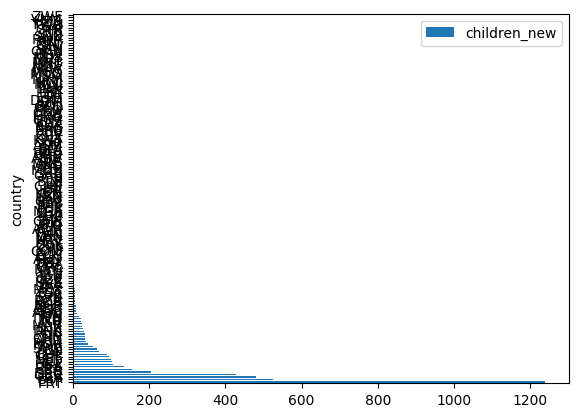

In [31]:
#Convierte children a uno cuando valor sea children y cero cuando sea none
df['children_new'] = df['children'].apply(lambda x: 1 if x == 'children' else 0)

#Suma children por pais ordenado por suma descendente
print("Suma children por pais ordenado por suma descendente: ")
ninos_por_pais = df.groupby('country', as_index=False)['children_new'].sum().sort_values(by='children_new', ascending=False)

#Manda la salida a un csv
#ninos_por_pais.to_csv('../data/ninos_por_pais.csv', index=False)

#Grafica niños por país en barras horizontales
import matplotlib.pyplot as plt
ninos_por_pais.plot(kind='barh', x='country', y='children_new')
plt.show()


In [60]:
#Dataframe con arrival date, conteo children_new = 0 y conteo children_new = 1
df.head()

#Crea un dataframe con arrival date, conteo children_new = 0 y conteo children_new = 1
df_children = df.groupby('arrival_date', as_index=False).agg({'children_new': ['sum', 'count']})
df_children.columns = ['arrival_date', 'children_1', 'total']

df_children.head()


,arrival_date,children_1,total
0,2015-07-01,1,78
1,2015-07-02,1,27
2,2015-07-03,2,21
3,2015-07-04,5,33
4,2015-07-05,4,27


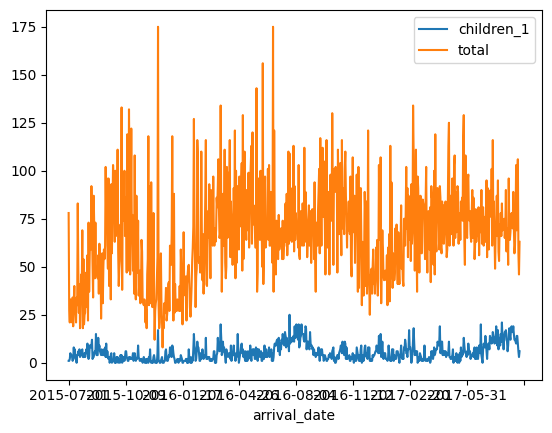

In [65]:
#Grafica df_children con arrival_date en x y children_1 y total en y
df_children.plot(x='arrival_date', y=['children_1', 'total'], kind='line')
plt.show()

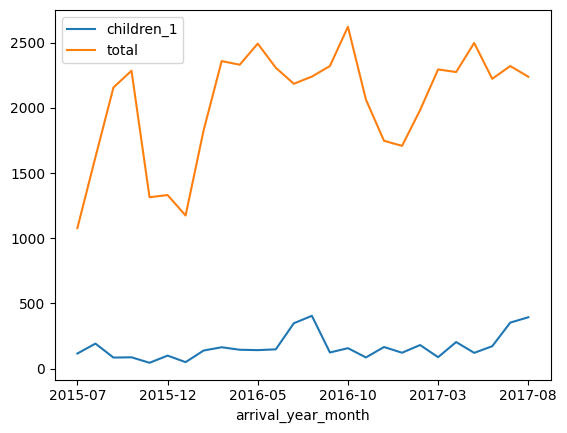

In [67]:
#Crea un dataframe con arrival year/month, conteo children_new = 0 y conteo children_new = 1
df['arrival_year_month'] = df['arrival_date'].apply(lambda x: x[:-3])
df_children = df.groupby('arrival_year_month', as_index=False).agg({'children_new': ['sum', 'count']})
df_children.columns = ['arrival_year_month', 'children_1', 'total']

#Grafica df_children con arrival_year_month en x y children_1 y total en y
df_children.plot(x='arrival_year_month', y=['children_1', 'total'], kind='line')
plt.show()


Suma children por pais ordenado por suma descendente: 


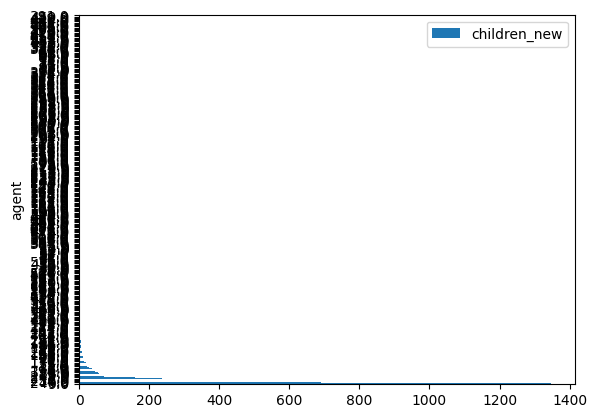

In [54]:
#Suma children por pais ordenado por suma descendente
print("Suma children por pais ordenado por suma descendente: ")
ninos_por_agente = df.groupby('agent', as_index=False)['children_new'].sum().sort_values(by='children_new', ascending=False)

#Manda la salida a un csv
#ninos_por_pais.to_csv('../data/ninos_por_pais.csv', index=False)

#Grafica niños por país en barras horizontales
import matplotlib.pyplot as plt
ninos_por_agente.plot(kind='barh', x='agent', y='children_new')
plt.show()

Suma children por pais ordenado por suma descendente: 


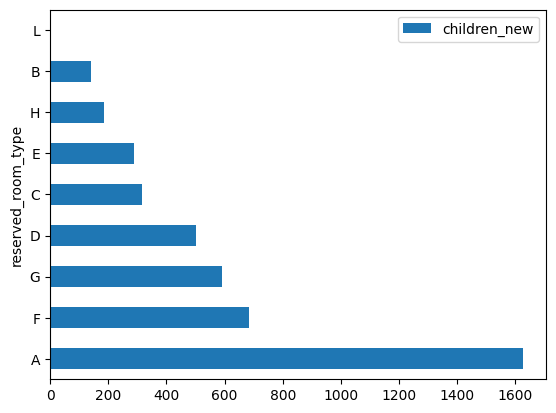

In [41]:
#Convierte children a uno cuando valor sea children y cero cuando sea none
df['children_new'] = df['children'].apply(lambda x: 1 if x == 'children' else 0)

#Suma children por pais ordenado por suma descendente
print("Suma children por pais ordenado por suma descendente: ")
ninos_por_room_type= df.groupby('reserved_room_type', as_index=False)['children_new'].sum().sort_values(by='children_new', ascending=False)

#Manda la salida a un csv
#ninos_por_pais.to_csv('../data/ninos_por_pais.csv', index=False)

#Grafica niños por país en barras horizontales
import matplotlib.pyplot as plt
ninos_por_room_type.plot(kind='barh', x='reserved_room_type', y='children_new')
plt.show()

In [32]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr = df.corr()

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap de Correlación de Variables')
plt.show()

ValueError: could not convert string to float: 'Resort_Hotel'